<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Change-the-working-directory" data-toc-modified-id="Change-the-working-directory-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Change the working directory</a></span></li></ul></li><li><span><a href="#Load-genotype-data-from-PLINK-format-file-(.bed)" data-toc-modified-id="Load-genotype-data-from-PLINK-format-file-(.bed)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load genotype data from PLINK format file (.bed)</a></span><ul class="toc-item"><li><span><a href="#SnpArrays.jl-installation" data-toc-modified-id="SnpArrays.jl-installation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><code>SnpArrays.jl</code> installation</a></span></li><li><span><a href="#Initialize-SnpArray" data-toc-modified-id="Initialize-SnpArray-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Initialize <code>SnpArray</code></a></span></li><li><span><a href="#Summaries" data-toc-modified-id="Summaries-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Summaries</a></span></li><li><span><a href="#Convert-genotypes-to-numeric-values" data-toc-modified-id="Convert-genotypes-to-numeric-values-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Convert genotypes to numeric values</a></span></li></ul></li><li><span><a href="#Load-genotype-data-from-.RData" data-toc-modified-id="Load-genotype-data-from-.RData-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load genotype data from .RData</a></span></li><li><span><a href="#Load-annotation-information-from-in-.RData" data-toc-modified-id="Load-annotation-information-from-in-.RData-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load annotation information from in .RData</a></span></li><li><span><a href="#Read-candidate-gene-information-saved-in-.txt-file" data-toc-modified-id="Read-candidate-gene-information-saved-in-.txt-file-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Read candidate gene information saved in .txt file</a></span></li><li><span><a href="#Read-phenotype-information-saved-in-.txt-file" data-toc-modified-id="Read-phenotype-information-saved-in-.txt-file-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Read phenotype information saved in .txt file</a></span></li><li><span><a href="#Organize-data-for-performing-variance-component-selection" data-toc-modified-id="Organize-data-for-performing-variance-component-selection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Organize data for performing variance component selection</a></span><ul class="toc-item"><li><span><a href="#Create-a-vector-of-matrices-V" data-toc-modified-id="Create-a-vector-of-matrices-V-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Create a vector of matrices <code>V</code></a></span></li></ul></li><li><span><a href="#Save-variables-to-a-JLD-file" data-toc-modified-id="Save-variables-to-a-JLD-file-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save variables to a JLD file</a></span><ul class="toc-item"><li><span><a href="#Install-JLD2" data-toc-modified-id="Install-JLD2-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Install JLD2</a></span></li><li><span><a href="#Write-data" data-toc-modified-id="Write-data-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Write data</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Read data</a></span></li></ul></li><li><span><a href="#Perform-variance-component-selection" data-toc-modified-id="Perform-variance-component-selection-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Perform variance component selection</a></span><ul class="toc-item"><li><span><a href="#Estimation-without-penalty" data-toc-modified-id="Estimation-without-penalty-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Estimation without penalty</a></span></li><li><span><a href="#Selection-at-specific-tuning-parameter" data-toc-modified-id="Selection-at-specific-tuning-parameter-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Selection at specific tuning parameter</a></span></li><li><span><a href="#Solution-path" data-toc-modified-id="Solution-path-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Solution path</a></span><ul class="toc-item"><li><span><a href="#Lasso-penalty" data-toc-modified-id="Lasso-penalty-9.3.1"><span class="toc-item-num">9.3.1&nbsp;&nbsp;</span>Lasso penalty</a></span></li><li><span><a href="#Adaptive-lasso-penalty" data-toc-modified-id="Adaptive-lasso-penalty-9.3.2"><span class="toc-item-num">9.3.2&nbsp;&nbsp;</span>Adaptive lasso penalty</a></span></li><li><span><a href="#MCP-penalty" data-toc-modified-id="MCP-penalty-9.3.3"><span class="toc-item-num">9.3.3&nbsp;&nbsp;</span>MCP penalty</a></span></li></ul></li></ul></li></ul></div>

## Introduction

This tutorial goes over how to use [`VarianceComponentSelect.jl`](https://github.com/juhkim111/VarianceComponentSelect.jl) using data saved in different format (`.bed`, `.RData`, `.txt`). 

Suppose we have the following files: 
* `hapmap3.bed` or `genotype.RData`: genotype data saved as `.bed` OR `.RData` file
* `annotation.RData`: gene annotation data saved as `.RData` 
* `covariate.txt`: phenotype (covariates and continuous trait of interest) saved as tab-delimited `.txt`
* `candidate_genes_sorted.txt`: list of candidate gene names saved as `.txt`

### Change the working directory 

First let us change the working directory to the directory that contains above files.

In [4]:
cd("/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis")

Examine what files are in the directory.

In [5]:
using Glob
readdir(glob"*.bed", pwd()) 

1-element Array{String,1}:
 "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/hapmap3.bed"

In [6]:
readdir(glob"*.RData", pwd())

2-element Array{String,1}:
 "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/annotation.RData"
 "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/genotype.RData"  

In [7]:
readdir(glob"*.txt", pwd()) 

4-element Array{String,1}:
 "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/candidate_genes.txt"       
 "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/candidate_genes_sorted.txt"
 "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/covariate.txt"             
 "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/gene_annotation.txt"       

## Load genotype data from PLINK format file (.bed)

In this section, we read Plink data and turn into 0/1/2/NA genotypes. This section requires `SnpArrays.jl` package.

### `SnpArrays.jl` installation 

[`SnpArrays.jl`](https://github.com/OpenMendel/SnpArrays.jl) package allows reading and manipulating SNP data saved as a `.bed` file. For more information about `SnpArrays.jl`, refer to its [documentation](https://openmendel.github.io/SnpArrays.jl/latest/). 

`SnpArrays.jl` requires Julia v0.7 or later, which can be obtained from (https://julialang.org/downloads/) or by building Julia from the sources in the (https://github.com/JuliaLang/julia) repository. 

The package has not yet been registered and must be installed using the repository location. Start julia and use the `]` key to switch to the package manager REPL

Use the backspace key to return to the Julia REPL.

### Initialize `SnpArray`

First load the package.

In [8]:
using SnpArrays

┌ Info: Recompiling stale cache file /Users/juhyun-kim/.julia/compiled/v1.1/SnpArrays/iEYce.ji for SnpArrays [4e780e97-f5bf-4111-9dc4-b70aaf691b06]
└ @ Base loading.jl:1184


`SnpArray` is the fundamental type for dealing with genoytpe data in Plink bed file. Each row of `SnpArray` is a sample and each column a SNP.

Initialize `SnpArray` from the Plink bed file. The corresponding `.fam` needs to be present in order to determine the number of individuals.

In [9]:
const hapmap3 = SnpArray("hapmap3.bed")

324×13928 SnpArray:
 0x03  0x03  0x00  0x03  0x03  0x03  …  0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x02  0x02  0x02  0x03  0x03     0x03  0x03  0x03  0x03  0x02  0x03
 0x03  0x03  0x02  0x02  0x02  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x02  0x03  0x02  0x03     0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x02  0x02  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x02  0x03  0x03  0x00  0x03  …  0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x03  0x03  0x00  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x00  0x03  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x02  0x02  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x02  0x03  0x03  0x03     0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x02  0x03  0x03  0x03  …  0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x03  0x02  0x03  0x03     0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x00  0x03  0x02  0x03     0x02  0x02  0x02  0x03  0x03  0x03
    ⋮

The data has 324 individuals at each of 13928 SNP positions.

In [10]:
size(hapmap3)

(324, 13928)

If only the bed file is present, supply the number of individuals in the second argument. 

In [11]:
SnpArray("hapmap3.bed", 324)

324×13928 SnpArray:
 0x03  0x03  0x00  0x03  0x03  0x03  …  0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x02  0x02  0x02  0x03  0x03     0x03  0x03  0x03  0x03  0x02  0x03
 0x03  0x03  0x02  0x02  0x02  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x02  0x03  0x02  0x03     0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x02  0x02  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x02  0x03  0x03  0x00  0x03  …  0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x03  0x03  0x00  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x00  0x03  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x02  0x02  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x02  0x03  0x03  0x03     0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x02  0x03  0x03  0x03  …  0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x03  0x02  0x03  0x03     0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x00  0x03  0x02  0x03     0x02  0x02  0x02  0x03  0x03  0x03
    ⋮

### Summaries 

Let us examine the data.
Minor allele frequencies (MAF) for each SNP:

In [12]:
maf(hapmap3)

13928-element Array{Float64,1}:
 0.0                  
 0.07763975155279501  
 0.32407407407407407  
 0.19158878504672894  
 0.441358024691358    
 0.0                  
 0.00462962962962965  
 0.4537037037037037   
 0.22685185185185186  
 0.1448598130841121   
 0.0                  
 0.4830246913580247   
 0.2538699690402477   
 ⋮                    
 0.23993808049535603  
 0.23993808049535603  
 0.25548589341692785  
 0.23913043478260865  
 0.23831775700934577  
 0.3109375            
 0.23913043478260865  
 0.23913043478260865  
 0.23913043478260865  
 0.0015432098765432167
 0.04179566563467496  
 0.006172839506172867 

Location/positions of the missing data are evaluated by 

In [13]:
mp = missingpos(hapmap3)

324×13928 SparseArrays.SparseMatrixCSC{Bool,Int32} with 11894 stored entries:
  [110  ,     1]  =  true
  [133  ,     1]  =  true
  [215  ,     1]  =  true
  [242  ,     1]  =  true
  [203  ,     2]  =  true
  [237  ,     2]  =  true
  [96   ,     4]  =  true
  [126  ,     4]  =  true
  [169  ,     4]  =  true
  [79   ,    10]  =  true
  [248  ,    10]  =  true
  [283  ,    10]  =  true
  ⋮
  [263  , 13921]  =  true
  [146  , 13922]  =  true
  [169  , 13922]  =  true
  [269  , 13922]  =  true
  [299  , 13922]  =  true
  [96   , 13923]  =  true
  [283  , 13923]  =  true
  [96   , 13924]  =  true
  [281  , 13924]  =  true
  [96   , 13925]  =  true
  [207  , 13925]  =  true
  [237  , 13927]  =  true

The number of missing data values in each column can be seen as

In [14]:
sum(mp, dims=1)

1×13928 Array{Int64,2}:
 4  2  0  3  0  0  0  0  0  3  2  0  1  …  1  1  5  2  3  4  2  2  2  0  1  0

### Convert genotypes to numeric values

We convert genotypes to numeric values for statistical analysis using `convert` function in `SnpArrays.jl`. 

By default, `convert` function translates genotypes according to the *additive* SNP model, which essentially counts the number of **A2** allele (0, 1, or 2) per genotype.

| Genotype | `SnpArray` | `model=ADDITIVE_MODEL` | `model=DOMINANT_MODEL` | `model=RECESSIVE_MODEL` |    
|:---:|:---:|:---:|:---:|:---:|  
| A1,A1 | 0x00 | 0 | 0 | 0 |  
| missing | 0x01 | NaN | NaN | NaN |
| A1,A2 | 0x02 | 1 | 1 | 0 |  
| A2,A2 | 0x03 | 2 | 1 | 1 |  

For more information, refer to [`SnpArrays.jl`](https://openmendel.github.io/SnpArrays.jl/latest/#convert-and-copyto!-1) documentation.


Convert whole SnpArray to a Float64 matrix using defaults (`model=ADDITIVE_MODEL, center=false, scale=false, impute=false`)

In [15]:
G = convert(Matrix{Float64}, hapmap3)

324×13928 Array{Float64,2}:
 2.0  2.0  0.0  2.0  2.0  2.0  1.0  1.0  …  1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  1.0  1.0  1.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  1.0  2.0
 2.0  2.0  1.0  1.0  1.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  1.0  2.0  2.0  1.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  1.0  2.0  2.0  0.0  2.0  2.0  2.0  …  0.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  0.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0  …  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  1.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  1.0  2.0  2.0  

Recall there are 11,894 missing values (coded as `NaN`).

In [16]:
# number of NaN values 
sum(isnan.(G))

11894

We can use `impute=true` argument in `convert` function to impute missing genotypes by column mean. 

In [17]:
Gimputed = convert(Matrix{Float64}, hapmap3, impute=true)

324×13928 Array{Float64,2}:
 2.0  2.0  0.0  2.0  2.0  2.0  1.0  1.0  …  1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  1.0  1.0  1.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  1.0  2.0
 2.0  2.0  1.0  1.0  1.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  1.0  2.0  2.0  1.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  1.0  2.0  2.0  0.0  2.0  2.0  2.0  …  0.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  0.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0  …  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  1.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  1.0  2.0  2.0  

Now there is no missing values in `Gimputed`.

In [18]:
sum(isnan.(Gimputed))

0

## Load genotype data from .RData

Now suppose genotype information is stored in `.RData`. 
To read R objects from `.RData` file, we need to add `RData` package in Julia. 
Start Julia and use the `]` key to switch to the package manager REPL

Or simply do from Julia REPL 

In [19]:
using Pkg
Pkg.add("RData")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


Now we load `genotype.RData` file, which stores R object called "geno" and "geno_imputed". "geno" is a genotype matrix with missing values while "geno_imputed" denotes imputed genotype matrix.

In [20]:
using RData
genotype = load("/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/genotype.RData")

┌ Info: Recompiling stale cache file /Users/juhyun-kim/.julia/compiled/v1.1/RData/idMMA.ji for RData [df47a6cb-8c03-5eed-afd8-b6050d6c41da]
└ @ Base loading.jl:1184


Dict{String,Any} with 2 entries:
  "geno"         => 324×13928 DataFrames.DataFrame. Omitted printing of 13921 c…
  "geno_imputed" => 324×13928 DataFrames.DataFrame. Omitted printing of 13921 c…

We can access "geno" and "geno_imputed" using following commands:

In [21]:
genotype["geno"]

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2.0,2.0,0.0,2.0,2.0,2.0,1.0,1.0,2.0
2,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
3,2.0,2.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0
4,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0
5,2.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,2.0
6,2.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0
8,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0
9,2.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,2.0


In [22]:
typeof(genotype["geno"])

DataFrames.DataFrame

Since `genotype["geno"]` is a DataFrame, we convert it to matrix of float by 

In [23]:
G2 = convert(Matrix{Float64}, genotype["geno"])

324×13928 Array{Float64,2}:
 2.0  2.0  0.0  2.0  2.0  2.0  1.0  1.0  …  1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  1.0  1.0  1.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  1.0  2.0
 2.0  2.0  1.0  1.0  1.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  1.0  2.0  2.0  1.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  1.0  2.0  2.0  0.0  2.0  2.0  2.0  …  0.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  0.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0  …  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  1.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  1.0  2.0  2.0  

Similarly for `genotype["geno_imputed]`:

In [24]:
Gimputed2 = convert(Matrix{Float64}, genotype["geno_imputed"])

324×13928 Array{Float64,2}:
 2.0  2.0  0.0  2.0  2.0  2.0  1.0  1.0  …  1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  1.0  1.0  1.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  1.0  2.0
 2.0  2.0  1.0  1.0  1.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  1.0  2.0  2.0  1.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  1.0  2.0  2.0  0.0  2.0  2.0  2.0  …  0.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  0.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0  …  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  1.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  1.0  2.0  2.0  

## Load annotation information from in .RData

To read R objects from `.RData` file, we use package `RData` as in [previous section](#Load-genotype-data-from-.RData). 


Now we load `annotation.RData` file, which stores R object called "ann". 

In [25]:
using RData
ann_file = load("/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/annotation.RData")

Dict{String,Any} with 1 entry:
  "ann" => 13928×7 DataFrames.DataFrame. Omitted printing of 1 columns…

We can access "ann" object using following command:

In [26]:
df_ann = ann_file["ann"]

,CHROM,SNP_NAME,DIST,CHROM_POS,A1,A2,GENE_NAME
,Int32,Categorical…,Int32,Int32,Int32,Int32,Categorical…
1,1,rs10458597,0,554484,0,2,gene1
2,1,rs12562034,0,758311,1,2,gene1
3,1,rs2710875,0,967643,1,2,gene1
4,1,rs11260566,0,1168108,1,2,gene1
5,1,rs1312568,0,1375074,1,2,gene1
6,1,rs35154105,0,1588771,0,2,gene1
7,1,rs16824508,0,1789051,1,2,gene1
8,1,rs2678939,0,1990452,1,2,gene1
9,1,rs7553178,0,2194615,1,2,gene1


`df_ann` contains information of 13,928 SNPs, including its chromosome (`df_ann.CHROM`), SNP name (`df_ann.SNP_NAME`), chromosome position (`df_ann.CHROM_POS`), and gene annotation (`df_ann.GENE_NAME`). 

## Read candidate gene information saved in .txt file

Names of candidate/target genes are saved in *tab-delimited* `candidate_genes.txt`. These names are made up for the purpose of this tutorial. 
We read the file using 

In [27]:
using DelimitedFiles
candidates = readdlm("candidate_genes_sorted.txt", '\t') # use '\t' since tab-delimited 


150×1 Array{Any,2}:
 "gene2"  
 "gene5"  
 "gene6"  
 "gene8"  
 "gene10" 
 "gene11" 
 "gene13" 
 "gene16" 
 "gene18" 
 "gene20" 
 "gene21" 
 "gene22" 
 "gene27" 
 ⋮        
 "gene294"
 "gene295"
 "gene296"
 "gene300"
 "gene301"
 "gene302"
 "gene305"
 "gene308"
 "gene309"
 "gene314"
 "gene321"
 "gene324"

We have a list of candidate gene names. There are 150 such genes out of 324 genes.

Now we find rows in `df_ann`  that contain candidate genes.

In [28]:
candid_idx = findall(in(candidates), df_ann.GENE_NAME)

6473-element Array{Int64,1}:
    45
    46
    47
    48
    49
    50
    51
    52
    53
    54
    55
    56
    57
     ⋮
 13889
 13890
 13891
 13892
 13893
 13894
 13895
 13896
 13897
 13898
 13899
 13900

In [29]:
filter(r -> any(occursin.(candidates, r.GENE_NAME)), df_ann)

,CHROM,SNP_NAME,DIST,CHROM_POS,A1,A2,GENE_NAME
,Int32,Categorical…,Int32,Int32,Int32,Int32,Categorical…
1,1,rs4926480,0,9534606,1,2,gene2
2,1,rs12047054,0,9737551,1,2,gene2
3,1,rs7518021,0,9940789,1,2,gene2
4,1,rs2273298,0,10140964,1,2,gene2
5,1,rs7546368,0,10341413,1,2,gene2
6,1,rs7512467,0,10544961,1,2,gene2
7,1,rs11121613,0,10746361,1,2,gene2
8,1,rs6659231,0,10946940,1,2,gene2
9,1,rs11121695,0,11152102,1,2,gene2


## Read phenotype information saved in .txt file 

In this section, we read phenotype information saved in .txt file.
First we install the package `CSV`. To install, you can either 

1) start Julia and use the `]` key to switch to the package manager REPL 


use the backspace key to return to Julia REPL

OR 2) simply do 

In [30]:
using Pkg
Pkg.add("CSV")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


Now load the package.

In [31]:
using CSV

Read the data from `covariate.txt`.

In [32]:
pheno = CSV.read("covariate.txt"; header=true, delim='\t') # use '\t' since tab-delimited 

,famid,perid,faid,moid,sex,trait,trait2
,String,String,Int64,Int64,Int64,Int64,Float64
1,2431,NA19916,0,0,1,4,0.518175
2,2424,NA19835,0,0,2,4,1.75633
3,2469,NA20282,0,0,2,4,2.22347
4,2368,NA19703,0,0,1,3,1.2579
5,2425,NA19901,0,0,2,3,1.86081
6,2427,NA19908,0,0,1,4,1.02811
7,2430,NA19914,0,0,2,4,2.0572
8,2470,NA20287,0,0,2,1,1.77039
9,2436,NA19713,0,0,2,3,1.94646


<a id='trueVC'></a>

For the purpose of our analysis, we use `sex` as our covariate and `trait2` as our phenotype of interest. We will save `sex` and `trait2` as `X` and `y`, respectively. Note that `trait2` (or `y`) was simulated using 

$$y \sim \text{Normal}(X\beta, \Omega),$$

where 
* $X$: `sex`
* $\beta=1.0$
* $\Omega = \sum_{i=1}^{150} \sigma_i^{2} V_i + \sigma_0^{2} \frac{1}{\sqrt{324}} I_{324},$ where 
    * $I_{324}$ is $324\times 324$ identity matrix
    * $\sigma^2 = (\sigma_1^2, \ldots, \sigma_{150}^{2}, \sigma_0^{2})$ is the truth, 
$$\sigma_i = \begin{cases} 2.236 & \text{ if } i=  1, 38, 75, 112, 150\\  1 & \text{ if } i=0 \\  0  & \text{ else} \end{cases}.$$



Type of `pheno.sex` is CSV.Column.

In [33]:
typeof(pheno.sex)

CSV.Column{Int64,Int64}

In [34]:
pheno.sex

324-element CSV.Column{Int64,Int64}:
 1
 2
 2
 1
 2
 1
 2
 2
 2
 1
 2
 1
 1
 ⋮
 1
 1
 2
 2
 2
 1
 1
 2
 1
 1
 1
 2

We convert `pheno.sex` to an `Array{Float64}`.

In [35]:
# convert X to a vector of float64; now X is Array{Float64, 1}
X = convert(Array{Float64}, pheno.sex)

324-element Array{Float64,1}:
 1.0
 2.0
 2.0
 1.0
 2.0
 1.0
 2.0
 2.0
 2.0
 1.0
 2.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 2.0
 2.0
 2.0
 1.0
 1.0
 2.0
 1.0
 1.0
 1.0
 2.0

We also convert `pheno.trait2` to an `Array{Float64}`. 

In [36]:
y = convert(Vector{Float64}, pheno.trait2)

324-element Array{Float64,1}:
 0.5181745783923235 
 1.7563255876086767 
 2.223470160560045  
 1.2579006587307098 
 1.860806437353566  
 1.028112990433079  
 2.057200135128053  
 1.770392906691606  
 1.946456043807813  
 1.2653273055152228 
 1.8210363054066185 
 0.9816735058475288 
 1.0196433215039131 
 ⋮                  
 1.3010252611690536 
 0.42529129561611123
 1.9899018399604986 
 2.144082020327153  
 1.7611984430688867 
 1.0324355558326748 
 0.7221317205804793 
 2.1139274496036498 
 1.1352386348242873 
 1.7520987036916529 
 0.8829809046246783 
 2.035154064202062  

## Organize data for performing variance component selection

### Create a vector of matrices `V`

Given $y$ is a $n\times 1$ phenotype vector, $X$ is a $n\times p$ covariate matrix, and $G_i$ are $n\times q_i$ genotype matrix for $i$-th gene, $i=1,\ldots, m$, we assume $$y \sim \text{Normal}(X\beta, \sigma_1^2 V_1 + \ldots + \sigma_m^2 V_m + \sigma_0^2\frac{1}{\sqrt{n}}I_n),$$

where $V_i$ is a kernel function for $i$-th gene and $V_i$ has Frobenius norm equal to 1. 

Here we simply use linear kernel function $V_i = G_iG_i^T$. However, any kernel function could be used to model the relationship among the effect sizes of the variants on the phenotypes. For example,
   1. $V_i = G_iW_iG_i^T$ where $W_i = \text{diag}(w_1, \ldots, w_{q_i})$ specifies weights of variants in $i$-th gene: uncorrelated effect sizes and corresponds to SKAT
   2. $V_i = G_iW_i1_{q_i}1_{q_i}^TW_iG_i^T$: correponds to the Burden test 

(Dutta, D., Scott, L., Boehnke, M., & Lee, S. (2019). Multi‐SKAT: General framework to test for rare‐variant association with multiple phenotypes. Genetic epidemiology, 43(1), 4-23.)

We use `Gimputed2` for our genotype matrix $G$. Here we create two vectors of matrices:

* `Garray`: vector of genotype matrix for each gene ($G_i$)
* `V`: vector of covariance matrix for each gene ($V_i = G_iG_i^T/||G_iG_i^T||_F$)

by going through the list of candidate gene names and subsetting SNPs that belong to gene $i$.

In [37]:
using LinearAlgebra

# no. of candidate genes 
m = length(candidates)

# sample size 
n = size(Gimputed2, 1)

# initialize array 
V  = Array{Matrix{Float64}}(undef, m + 1)
Garray = Array{Matrix{Float64}}(undef, m)

# fill in array 
for i in 1:m 
    # find indices of SNPs annotated to be gene i 
    tmp_idx = findall(x -> x == candidates[i], df_ann.GENE_NAME)
    
    # subset genotype matrix using those indices 
    Garray[i] = Gimputed2[:, tmp_idx]
    
    # multiply by its transpose 
    V[i] = Garray[i] * Garray[i]'
    # divide by its frobenius norm 
    V[i] = V[i] / norm(V[i])    
end 

V[end] = Matrix(I, n, n) ./ √n

324×324 Array{Float64,2}:
 0.0555556  0.0        0.0        …  0.0        0.0        0.0      
 0.0        0.0555556  0.0           0.0        0.0        0.0      
 0.0        0.0        0.0555556     0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 0.0        0.0        0.0        …  0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 0.0        0.0        0.0        …  0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 ⋮                                ⋱                                 
 0.0    

`Garray` is a $150\times 1$ vector whose elements are $324\times q_i$ matrices ($q_i$ denotes the number of SNPs in gene $i$). $i$-th element in `Garray` is a genotype matrix (matrix of minor allele counts) of $q_i$ SNPs for $i$-th gene, $i=1,\ldots,150.$

In [38]:
Garray

150-element Array{Array{Float64,2},1}:
 [2.0 0.0 … 2.0 2.0; 2.0 1.0 … 1.4486 2.0; … ; 2.0 0.0 … 1.0 2.0; 2.0 0.0 … 2.0 2.0] 
 [2.0 2.0 … 2.0 2.0; 2.0 1.0 … 1.0 0.0; … ; 2.0 1.0 … 1.0 0.0; 2.0 2.0 … 1.0 2.0]    
 [2.0 2.0 … 0.0 2.0; 2.0 2.0 … 2.0 2.0; … ; 2.0 2.0 … 1.0 2.0; 2.0 2.0 … 0.0 1.0]    
 [2.0 1.0 … 0.0 2.0; 2.0 1.0 … 0.0 2.0; … ; 2.0 0.0 … 1.0 2.0; 1.0 1.0 … 1.0 2.0]    
 [1.0 2.0 … 0.0 2.0; 1.0 2.0 … 1.0 2.0; … ; 0.0 2.0 … 1.0 2.0; 2.0 2.0 … 0.0 2.0]    
 [2.0 2.0 … 1.0 2.0; 2.0 2.0 … 1.0 2.0; … ; 2.0 2.0 … 1.0 2.0; 2.0 2.0 … 1.0 2.0]    
 [2.0 1.0 … 1.0 2.0; 2.0 1.0 … 1.0 2.0; … ; 2.0 2.0 … 0.0 2.0; 2.0 2.0 … 1.0 2.0]    
 [1.0 1.0 … 1.0 1.0; 1.0 2.0 … 1.0 0.0; … ; 2.0 2.0 … 2.0 1.0; 2.0 2.0 … 2.0 1.0]    
 [2.0 2.0 … 2.0 0.0; 2.0 1.0 … 1.0 0.0; … ; 1.0 2.0 … 2.0 0.0; 2.0 2.0 … 2.0 1.0]    
 [2.0 2.0 … 2.0 1.0; 2.0 2.0 … 2.0 1.0; … ; 2.0 2.0 … 2.0 1.0; 2.0 0.0 … 2.0 1.0]    
 [1.0 2.0 … 2.0 2.0; 0.0 1.0 … 2.0 2.0; … ; 2.0 1.0 … 2.0 2.0; 1.0 0.0 … 1.0 2.0]    
 [2.0 0.0 … 2.0

`V` is a $151\times 1$ vector whose elements are $324\times 324$ matrices. $i$-th element in `V` corresponds to $i$-th gene, $i=1,\ldots, 150.$ Last element in `V` equals to $\frac{1}{\sqrt{n}} I_{n}, $ where $ n=324.$

In [39]:
V

151-element Array{Array{Float64,2},1}:
 [0.00329167 0.00302173 … 0.00308537 0.00299512; 0.00302173 0.00317597 … 0.00292075 0.00296242; … ; 0.00308537 0.00292075 … 0.0033536 0.00305443; 0.00299512 0.00296242 … 0.00305443 0.0034696]  
 [0.00387367 0.00315427 … 0.00345863 0.00367999; 0.00315427 0.00309894 … 0.00323728 0.00309894; … ; 0.00345863 0.00323728 … 0.00373533 0.0034033; 0.00367999 0.00309894 … 0.0034033 0.00379066]  
 [0.00313494 0.00296215 … 0.00301152 0.00273999; 0.00296215 0.00328305 … 0.00306089 0.00283873; … ; 0.00301152 0.00306089 … 0.00340647 0.00301152; 0.00273999 0.00283873 … 0.00301152 0.00315963]
 [0.00304739 0.00275335 … 0.00259296 0.00299393; 0.00275335 0.00302066 … 0.00261969 0.00291373; … ; 0.00259296 0.00261969 … 0.00299393 0.002887; 0.00299393 0.00291373 … 0.002887 0.00350183]    
 [0.00340443 0.00283702 … 0.00274743 0.00310579; 0.00283702 0.00313566 … 0.00265784 0.00286689; … ; 0.00274743 0.00265784 … 0.00313566 0.00286689; 0.00310579 0.00286689 … 0.00286689 0.0

## Save variables to a JLD file 

In this section, we save variables to a JLD file. By doing so, we do not have to run all the cells above every time we re-open this .ipynb file.

### Install JLD2

To install, you can either

1) start Julia and use ] key to switch to the package manager REPL

use the backspace key to return to Julia REPL

OR 2) simply do

In [2]:
using Pkg
Pkg.add("JLD2")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


### Write data

First load the package.

In [3]:
using JLD2

The `@save` macro writes one or more variables from the current scope to the JLD file.

In [40]:
@save "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/VarianceComponentSelect.jl/docs/tutorial_SNPset.jld2" m y X Garray V

### Read data

Next time we do not have to run all the cells above. Instead simply load variables out of jld file:

In [1]:
using JLD2
@load "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/VarianceComponentSelect.jl/docs/tutorial_SNPset.jld2" m y X Garray V

5-element Array{Symbol,1}:
 :m     
 :y     
 :X     
 :Garray
 :V     

## Perform variance component selection 

We assume that response vector $y$ is distributed as 

$$y \sim \text{Normal}(X\beta, \sigma_1^2 V_1 + \cdots + \sigma_{150}^2 V_{150} + \sigma_0^2 \frac{1}{\sqrt{n}} I_n),$$

where each $\sigma_i^2$ indicates variance component for $i$-th gene, $i=1,\ldots, 150.$ Define $\Omega = \text{Var}(y) = \sigma_1^2 V_1 + \cdots + \sigma_{150}^2 V_{150} + \sigma_0^2 \frac{1}{\sqrt{n}} I_n$.

Suppose we want to select genes that are associated with response $y.$ This is equivalent to finding non-zero $\sigma_i^2, i=1,\ldots, 150$. In this section, we perform variance component selection using `VarianceComponentSelect` package in Julia. 

First, add `VarianceComponentSelect.jl` package first. 

The package `VarianceComponentSelect.jl` has not yet been registered and must be installed using the repository location. Start julia and use the `]` key to switch to the package manager REPL

First load the package.

In [2]:
using VarianceComponentSelect

### Estimation without penalty

First, we estimate $\sigma^2 = (\sigma_1^2, \ldots, \sigma_{150}^2, \sigma_0^2)$ using no penalty (equivalent to having tuning parameter $\lambda=0$). We use `vcselect` function, which takes `y, X` and `V` as input arguments. 


Required arguments of `vcselect` are:

* `y`, response vector
* `X`, design matrix
* `V`, vector of covariance matrices.

Output we get from `vcselect`: 

* `σ̂2`: estimate of variance components 
* `β̂`: estimate of fixed effects parameter vector
* `obj`: objective value at `σ̂2`
* `niters`: the number of iterations to convergence.

In [3]:
σ̂2, β̂, obj, niters, = vcselect(y, X, V)

([1.0148, 1.4949, 0.497996, 1.73181e-105, 4.41185e-82, 0.522078, 5.75845e-115, 5.0243e-17, 9.56908e-49, 0.084671  …  0.619701, 0.503425, 1.64577e-8, 1.21417e-42, 6.39477e-103, 2.43803e-39, 0.833227, 1.52418e-5, 0.493273, 1.0e-8], 1.0346600140514612, -4.803994907572303, 1000, [0.0741005 0.0652281 … 0.0673095 0.0684192; 0.0652281 0.0710088 … 0.0647445 0.0665493; … ; 0.0673095 0.0647445 … 0.0744422 0.0680341; 0.0684192 0.0665493 … 0.0680341 0.0763718])

`σ̂2` is a $151\times1$ vector. $i$-th value in `σ̂2` represents variance component for $i$-th gene, $i=1,\ldots,150$. The last value in `σ̂2` is estimated $\widehat{\sigma}_0^2.$

In [4]:
σ̂2

151-element Array{Float64,1}:
 1.014798860475978      
 1.494898360213692      
 0.4979957759904224     
 1.7318140228432391e-105
 4.411848910907218e-82  
 0.5220780999970255     
 5.75844844121054e-115  
 5.0243026091080946e-17 
 9.569082055619838e-49  
 0.08467100348488524    
 1.4842260317779525e-55 
 3.6740562450218057e-33 
 0.06668839408327482    
 ⋮                      
 2.017711741373091e-109 
 4.9562792390815645e-9  
 0.6197012146518334     
 0.5034245591094942     
 1.645765286573534e-8   
 1.2141685621806592e-42 
 6.394767966009177e-103 
 2.4380254916823327e-39 
 0.8332269363937755     
 1.5241814659891492e-5  
 0.4932732517193711     
 1.0e-8                 

We save reciprocal of square root of the estimates as penalty weights. 

In [5]:
penwt = zeros(m + 1)
penwt[1:m] = 1 ./ sqrt.(σ̂2[1:m])

150-element Array{Float64,1}:
     0.9926816972305096   
     0.8178886232660089   
     1.4170565128746615   
     2.402975672417598e52 
     4.760906851453649e40 
     1.3839878008186268   
     1.3177931892466902e57
     1.4107891327749512e8 
     1.0222682220535907e24
     3.436628968288985    
     2.5956729890368955e27
     1.6497840469200914e16
     3.872352376013346    
     ⋮                    
     1.8610509002461682e11
     2.2262320940563745e54
 14204.374585728392       
     1.270307394982251    
     1.4093952412946429   
  7794.998772797846       
     9.07528992412703e20  
     1.2505112543056126e51
     2.025260436698537e19 
     1.0955150529120787   
   256.142510520755       
     1.423823697916432    

Estimated fixed effects parameter:

In [6]:
β̂

1.0346600140514612

Number of iterations to convergence:

In [7]:
niters

1000

Objective value at `σ̂2`:

In [8]:
obj

-4.803994907572303

### Selection at specific tuning parameter 

Now we want to select variance components at $\lambda= 2.0$ using lasso penalty.

To do so, we again use `vcselect` function. Required arguments of `vcselect` are:

* `y`, response vector
* `X`, design matrix
* `V`, vector of covariance matrices.

Keyword (optional) arguments include: 
* `penfun`, penalty function (e.g. `L1Penalty()`, `MCPPenalty()`), default is no penalty (`NoPenalty()`)
* `λ`, tuning parameter value. 

`vcselect` function returns:
* `σ̂2`, a vector of estimated variance components
* `β̂`, estimated fixed effects paramter vector
* `obj`, objective value at the estimate `σ̂2`
* `niters`, the number of iterations to reach convergence
* `Ω̂`, the estimated overall covariance matrix. 

In [9]:
σ̂2, β̂, obj, niters, Ω̂ = vcselect(y, X, V; penfun= L1Penalty(), λ=2.0)

([0.472779, 0.461145, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.801957, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.310576, 0.767475], 1.0000288802130308, 29.36103602463436, 595, [0.062959 0.0175143 … 0.0182775 0.0185736; 0.0175143 0.0612689 … 0.0170895 0.0176262; … ; 0.0182775 0.0170895 … 0.0629439 0.0184543; 0.0185736 0.0176262 … 0.0184543 0.063565])

Let's take a look at the estimates for $\sigma^2 = (\sigma_1^2, \ldots,  
\sigma_{150}^2, 
\sigma_0^2).$ Note that the last element equals to an estimate of $\sigma_0^2$.

In [10]:
σ̂2

151-element Array{Float64,1}:
 0.47277866485047765
 0.4611451716822333 
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 ⋮                  
 0.0                
 0.0                
 0.0                
 0.8019569857375959 
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.31057593668804373
 0.7674747917312895 

Selected variance components (i.e. positive ones) are as follows. Recall [indices of true variance components are  1, 38, 75, 112, and 150](#trueVC). 

In [11]:
findall(x -> x > 0, σ̂2[1:end-1])

10-element Array{Int64,1}:
   1
   2
  22
  59
  80
 103
 106
 109
 143
 150

We also have estimates for fixed effects parameter $\beta.$

In [12]:
β̂

1.0000288802130308

We also have estimated overall covariance matrix $\widehat{\Omega}$ using ${\widehat{\sigma}}^2$:

In [13]:
Ω̂

324×324 Array{Float64,2}:
 0.062959   0.0175143  0.0177283  …  0.0183687  0.0182775  0.0185736
 0.0175143  0.0612689  0.0169575     0.0176813  0.0170895  0.0176262
 0.0177283  0.0169575  0.0626983     0.0183534  0.01763    0.0182091
 0.0182819  0.0174298  0.0183358     0.0189186  0.0185234  0.0189599
 0.0183785  0.0174994  0.0183827     0.0190911  0.0184347  0.0188899
 0.0181766  0.0174927  0.017825   …  0.0187436  0.0180851  0.0188972
 0.0183242  0.0174214  0.0180307     0.018958   0.0184747  0.0188568
 0.0181625  0.0174275  0.0179697     0.0187376  0.0182139  0.0187397
 0.0180307  0.0176423  0.0180172     0.0186019  0.017954   0.0184748
 0.0174448  0.0166106  0.0171996     0.0178853  0.017157   0.01744  
 0.0181613  0.0176586  0.0179143  …  0.0188906  0.0182412  0.0183245
 0.0180568  0.0173765  0.0177944     0.0184298  0.0176509  0.0182179
 0.0181076  0.0174197  0.0181962     0.0187111  0.0180492  0.0183745
 ⋮                                ⋱                                 
 0.01878

The same procedure can be applied for different penalties at different $\lambda$ values. We try MCP penalty and 1.5 as tuning parameter ($\lambda$) value.

In [14]:
σ̂2, β̂, obj, niters, Ω̂ = vcselect(y, X, V; penfun= MCPPenalty(), λ=1.5)

([0.953462, 0.398979, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 1.20117, 0.265647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.478657, 0.37998], 1.005783546086883, 22.77018465177042, 384, [0.0644886 0.0379478 … 0.0391531 0.0395333; 0.0379478 0.0624563 … 0.0375574 0.0385054; … ; 0.0391531 0.0375574 … 0.0646252 0.0395581; 0.0395333 0.0385054 … 0.0395581 0.0657536])

In [15]:
σ̂2

151-element Array{Float64,1}:
 0.9534615878834257
 0.3989786303621227
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 ⋮                 
 0.0               
 0.0               
 0.0               
 1.2011704648600097
 0.265647480244233 
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.4786567178269769
 0.3799797184774514

In [16]:
β̂

1.005783546086883

### Solution path 

#### Lasso penalty 

What if we want to look at solutions across different tuning parameter values? Then we obtain a solution path.
Here we obtain solution paths using three different penalties: lasso (`L1Penalty()`), adaptive lasso (`L1Penalty()` with penalty weight `penwt`), and MCP penalty (`MCPPenalty()`). For MCP penalty, default `γ` value equals to 2.0.

Let's start with lasso penalty. We use `vcselectpath` function in `VarianceComponentSelect` package. 
Required arguments are 
* `y`: response vector
* `X`: matrix of covariates 
* `V`: vector of covariance matrices for each gene. 

Optional arguments include, but not limited to, 

* `penfun`: penalty function, e.g. `L1Penalty()`, `MCPPenalty()`, default is `NoPenalty()`
* `nlambda`: number of tuning parameters, default is 100
* `fixedeffects`: indicator of whether user wants fixed effects parameter estimates to be returned, default is false 
* `λpath`: array of tuning parameter values. If not supplied, a grid of tuning parameter values is created internally. 

We obtain solution path using lasso penalty (`penfun=L1Penalty()`). We also want fixed effects parameter estimates to be returned (`fixedeffects=true`).

In [17]:
σ̂2path_lasso, objpath_lasso, λpath, _, β̂path_lasso = vcselectpath(y, X, V;
      penfun=L1Penalty(), fixedeffects=true)

([1.0148 1.02856 … 0.0 0.0; 1.4949 1.49371 … 0.0 0.0; … ; 0.493273 0.486637 … 0.0 0.0; 1.0e-8 1.0e-8 … 1.20886 1.26421], [-4.80399, -3.8261, -2.85451, -1.90715, -0.949609, -0.00826035, 0.938234, 1.85511, 2.76197, 3.6587  …  30.3788, 30.4077, 30.4361, 30.4642, 30.4919, 30.519, 30.5457, 30.5717, 30.5969, 29.6346], 0.0:0.03898974617653775:3.859984871477237, [1000, 750, 1000, 1000, 355, 1000, 1000, 1000, 461, 484  …  43, 46, 49, 53, 58, 64, 74, 89, 122, 700], [1.03466, 1.03468, 1.03488, 1.03552, 1.03558, 1.03567, 1.03546, 1.03518, 1.03541, 1.0347  …  0.999031, 0.999058, 0.999087, 0.999119, 0.999155, 0.999195, 0.999243, 0.999301, 0.999381, 1.00163])

Here is the solution path. 

Each column represents estimated variance component at specific $\lambda$ in `λpath_lasso`. In the solution path, 151 rows and 100 columnns represent 151 variance components and 100 tuning parameter values, respectively. $i$-th row represents estimates of $\sigma_i^2$, $i=1,\ldots, 150$ while the last row represents estimates of $\sigma_0^2$. From left to right, $\lambda$ value is supposed to increase, which can be verified by displaying `λpath`.

In [18]:
σ̂2path_lasso

151×100 Array{Float64,2}:
 1.0148        1.02856    1.02918    …  0.0      0.0      0.0      0.0    
 1.4949        1.49371    1.49696       0.0      0.0      0.0      0.0    
 0.497996      0.490328   0.481791      0.0      0.0      0.0      0.0    
 1.73181e-105  0.0        0.0           0.0      0.0      0.0      0.0    
 4.41185e-82   0.0        0.0           0.0      0.0      0.0      0.0    
 0.522078      0.52196    0.520718   …  0.0      0.0      0.0      0.0    
 5.75845e-115  0.0        0.0           0.0      0.0      0.0      0.0    
 5.0243e-17    0.0        0.0           0.0      0.0      0.0      0.0    
 9.56908e-49   0.0        0.0           0.0      0.0      0.0      0.0    
 0.084671      0.0754845  0.0730861     0.0      0.0      0.0      0.0    
 1.48423e-55   0.0        0.0        …  0.0      0.0      0.0      0.0    
 3.67406e-33   0.0        0.0           0.0      0.0      0.0      0.0    
 0.0666884     0.0716722  0.0495238     0.0      0.0      0.0      0.0    

Note the `λpath` given below. It ranges from $0$ to $3.859984$ and it increments by $0.0389.$
First column in `σ̂2path_lasso` contains estimates at $\lambda=0.0$, second column is at $\lambda=0.0389$, and so on.

In [19]:
λpath

0.0:0.03898974617653775:3.859984871477237

We also print estimate for fixed effects parameter $\beta$ at each $\lambda.$ 

In [20]:
β̂path_lasso

100-element Array{Float64,1}:
 1.0346600140514612
 1.0346836969886342
 1.0348752393940817
 1.0355150251156224
 1.0355764127249292
 1.0356670798740806
 1.0354615730132435
 1.035178966502148 
 1.0354067219643186
 1.0346980352190773
 1.0346740127505827
 1.0346666115328262
 1.0346619199729117
 ⋮                 
 0.9989836307209076
 0.9990066119036292
 0.9990312677799091
 0.9990580291691029
 0.9990871097491607
 0.9991191463296069
 0.9991548544421616
 0.9991952881875881
 0.9992427528872021
 0.9993008618214797
 0.9993806162211902
 1.0016282986689713

Alternatively, you can supply your own grid of tuning parameter values. Say we want 100 $\lambda$ values to be linearly spaced from 0 to 3.5, i.e. `λpath=range(0, 3.5, length=100)`.

In [21]:
σ̂2path_lasso, objpath_lasso, λpath, _, β̂path_lasso = vcselectpath(y, X, V;
       penfun=L1Penalty(), fixedeffects=true, λpath=range(0, 3.5, length=100))

([1.0148 1.02892 … 0.0 0.0; 1.4949 1.49339 … 0.0 0.0; … ; 0.493273 0.486315 … 0.0 0.0; 1.0e-8 1.0e-8 … 1.19431 1.19528], [-4.80399, -3.91711, -3.03389, -2.1754, -1.30653, -0.439714, 0.409349, 1.24298, 2.08953, 2.91111  …  30.1235, 30.1521, 30.1805, 30.2086, 30.2365, 30.2641, 30.2915, 30.3186, 30.3455, 30.372], 0.0:0.03535353535353535:3.5, [1000, 793, 1000, 1000, 276, 1000, 1000, 1000, 1000, 539  …  30, 31, 32, 33, 34, 35, 36, 38, 39, 41], [1.03466, 1.03467, 1.03479, 1.03548, 1.03555, 1.03562, 1.03562, 1.03514, 1.03545, 1.03538  …  0.998866, 0.99888, 0.998895, 0.998911, 0.998927, 0.998945, 0.998963, 0.998983, 0.999003, 0.999025])

Let's take a look at the solution path. 

In [22]:
σ̂2path_lasso

151×100 Array{Float64,2}:
 1.0148        1.02892    1.02923    …  0.0     0.0      0.0      0.0    
 1.4949        1.49339    1.49497       0.0     0.0      0.0      0.0    
 0.497996      0.490782   0.484544      0.0     0.0      0.0      0.0    
 1.73181e-105  0.0        0.0           0.0     0.0      0.0      0.0    
 4.41185e-82   0.0        0.0           0.0     0.0      0.0      0.0    
 0.522078      0.522086   0.52209    …  0.0     0.0      0.0      0.0    
 5.75845e-115  0.0        0.0           0.0     0.0      0.0      0.0    
 5.0243e-17    0.0        0.0           0.0     0.0      0.0      0.0    
 9.56908e-49   0.0        0.0           0.0     0.0      0.0      0.0    
 0.084671      0.0756334  0.0732632     0.0     0.0      0.0      0.0    
 1.48423e-55   0.0        0.0        …  0.0     0.0      0.0      0.0    
 3.67406e-33   0.0        0.0           0.0     0.0      0.0      0.0    
 0.0666884     0.0734038  0.0595504     0.0     0.0      0.0      0.0    
 ⋮          

Each column represents estimated variance components at specific $\lambda$ in `λpath_lasso`. 

In [23]:
λpath

0.0:0.03535353535353535:3.5

Vector of estimates for fixed effects parameter $\beta$ at each $\lambda$:

In [24]:
β̂path_lasso

100-element Array{Float64,1}:
 1.0346600140514612
 1.034667162612787 
 1.0347923880720569
 1.0354838263570179
 1.0355457970552193
 1.0356234906163948
 1.0356175449305085
 1.0351446562947213
 1.0354547400949865
 1.0353773361560672
 1.0346976838581752
 1.0346746648304974
 1.0346674889297756
 ⋮                 
 0.9988395495481184
 0.9988525540822604
 0.9988661650978679
 0.9988804133776404
 0.9988953461126183
 0.9989110185827077
 0.9989274944622492
 0.9989448475194205
 0.9989631639795906
 0.9989826982412802
 0.9990032952256667
 0.9990253784671196

  When $\lambda = 3.5$ (the rightmost column in solution path `σ2path_lasso`) the only non-zero variance component in the solution path (except for $\sigma_0^2$) is $\sigma_{80}^2.$ 

In [25]:
findall(σ̂2path_lasso[1:150, end] .> 0)

1-element Array{Int64,1}:
 80

We can get the order in which variance components enter solution path `σ2path_lasso` using the function `rankvarcomps`.

First output (which we name as `ranking`) in `rankvarcomps` lists positive variance components in the solution path when $\lambda > 0$ in the order they entered solution path. Second output (named `zerovarcomps`) is zero variance components in the solution path when $\lambda > 0 .$ 

In [26]:
ranking, zerovarcomps = rankvarcomps(σ̂2path_lasso)

([80, 1, 143, 150, 59, 2, 106, 119, 103, 40  …  71, 55, 101, 43, 115, 10, 29, 54, 13, 130], [4, 5, 7, 8, 9, 11, 12, 14, 15, 16  …  138, 139, 140, 141, 144, 145, 146, 147, 149, 151])

In [27]:
ranking

35-element Array{Int64,1}:
  80
   1
 143
 150
  59
   2
 106
 119
 103
  40
  95
  87
 148
   ⋮
   3
  18
  71
  55
 101
  43
 115
  10
  29
  54
  13
 130

Rest of the variance components that are estimated to be zero at all λ > 0:

In [28]:
zerovarcomps

116-element Array{Int64,1}:
   4
   5
   7
   8
   9
  11
  12
  14
  15
  16
  19
  20
  21
   ⋮
 136
 137
 138
 139
 140
 141
 144
 145
 146
 147
 149
 151

Now we plot solution path using function `plotsolpath`. Required input arguments are: 

- `σ2path`: solution path (in numeric matrix) to be plotted, each column should represent variance components at specific `λ` as in output from `vcselect`, `vcselectpath`
- `λpath`: vector of tuning parameter λ values.

Optional arguments are 

- `title`: title of the figure, default is "Solution Path"
- `xlab`: x-axis label, default is minimum of λpath
- `ylab`: y-axis label, default is maximum of λpath
- `linewidth`: line width, default is 1.0
- `nranks`: no. of ranks to display on legend, default is total number of variance components
- `legend`: indicator to include legend or not, default is true 
- `legendout`: indicator to move legend outside the plot, default is false.

Legend on the right displays variance components in the order they entered solution path. By default, legend is displayed within the figure. 

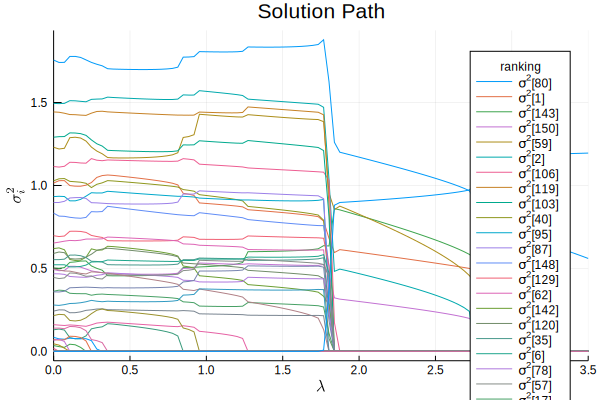

In [29]:
plotsolpath(σ̂2path_lasso, λpath)

There are 35 non-zero variance components when $\lambda > 0. $ So let us limit the number of variance components to be displayed on the legend (`nranks=15`) and place the legend outside the figure (`legendout=true`). 

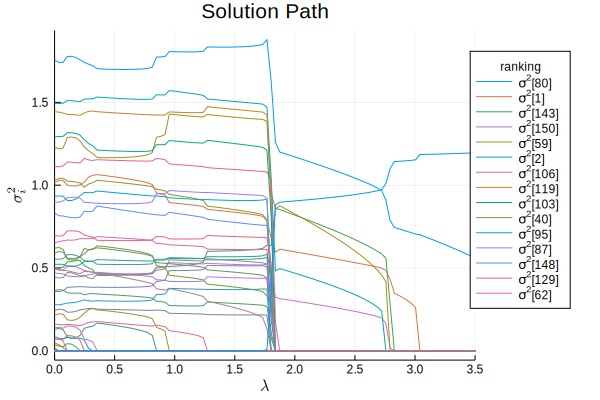

In [30]:
plotsolpath(σ̂2path_lasso, λpath; nranks=15, legendout=true)

If we do not want legend, simply do `legend=false` or `nranks=0`. From the plot, one line does not decrease to 0 as $\lambda$ increases. The line represents $\sigma_0^2$, which is not part of the selection and expected to be greater than 0. 

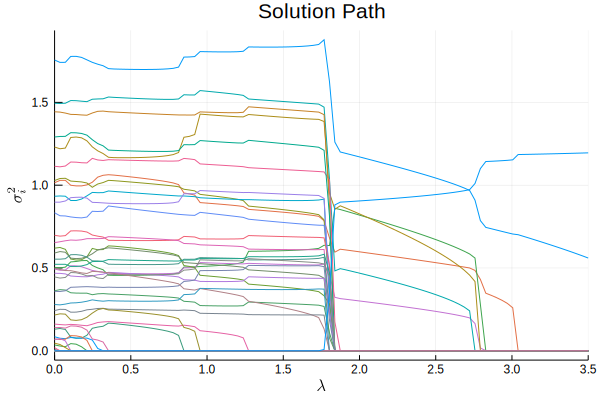

In [31]:
#plotsolpath(σ̂2path_lasso, λpath; legend=false)
plotsolpath(σ̂2path_lasso, λpath; nranks=0)

#### Adaptive lasso penalty 

Recall we saved penalty weight from estimates in [variance component selection without penalty](#Estimation-without-penalty) section. We use those penalty weights for adaptive lasso penalty.

In [32]:
penwt

151-element Array{Float64,1}:
     0.9926816972305096   
     0.8178886232660089   
     1.4170565128746615   
     2.402975672417598e52 
     4.760906851453649e40 
     1.3839878008186268   
     1.3177931892466902e57
     1.4107891327749512e8 
     1.0222682220535907e24
     3.436628968288985    
     2.5956729890368955e27
     1.6497840469200914e16
     3.872352376013346    
     ⋮                    
     2.2262320940563745e54
 14204.374585728392       
     1.270307394982251    
     1.4093952412946429   
  7794.998772797846       
     9.07528992412703e20  
     1.2505112543056126e51
     2.025260436698537e19 
     1.0955150529120787   
   256.142510520755       
     1.423823697916432    
     0.0                  

In [33]:
σ̂2path_adlasso, objpath_adlasso, λpath_adlasso, _, β̂path_adlasso = 
        vcselectpath(y, X, V; penfun=L1Penalty(), fixedeffects=true,
        penwt=penwt)

([1.0148 1.03053 … 0.0 0.0; 1.4949 1.53778 … 0.0 0.0; … ; 0.493273 0.496446 … 0.0 0.0; 1.0e-8 1.0e-8 … 1.20896 1.26421], [-4.80399, -3.14272, -1.59881, -0.106613, 1.32626, 2.71273, 4.12512, 5.53008, 6.81773, 8.18189  …  30.3795, 30.4084, 30.4368, 30.4649, 30.4926, 30.5197, 30.5463, 30.5723, 30.5975, 29.6346], 0.0:0.05168062067539483:5.116381446864088, [1000, 519, 1000, 258, 593, 650, 137, 289, 233, 57  …  43, 46, 49, 53, 58, 64, 74, 90, 124, 662], [1.03466, 1.0354, 1.03537, 1.035, 1.03559, 1.03577, 1.03568, 1.03558, 1.03548, 1.03537  …  0.999032, 0.999059, 0.999088, 0.99912, 0.999156, 0.999196, 0.999244, 0.999303, 0.999383, 1.00163])

In [34]:
 λpath_adlasso

0.0:0.05168062067539483:5.116381446864088

In [35]:
σ̂2path_adlasso

151×100 Array{Float64,2}:
 1.0148        1.03053   1.06357   …  0.0    0.0      0.0      0.0    
 1.4949        1.53778   1.5615       0.0    0.0      0.0      0.0    
 0.497996      0.501011  0.491002     0.0    0.0      0.0      0.0    
 1.73181e-105  0.0       0.0          0.0    0.0      0.0      0.0    
 4.41185e-82   0.0       0.0          0.0    0.0      0.0      0.0    
 0.522078      0.540453  0.548439  …  0.0    0.0      0.0      0.0    
 5.75845e-115  0.0       0.0          0.0    0.0      0.0      0.0    
 5.0243e-17    0.0       0.0          0.0    0.0      0.0      0.0    
 9.56908e-49   0.0       0.0          0.0    0.0      0.0      0.0    
 0.084671      0.061315  0.0          0.0    0.0      0.0      0.0    
 1.48423e-55   0.0       0.0       …  0.0    0.0      0.0      0.0    
 3.67406e-33   0.0       0.0          0.0    0.0      0.0      0.0    
 0.0666884     0.0       0.0          0.0    0.0      0.0      0.0    
 ⋮                                 ⋱               

From the plot, we notice that one line does not decrease to 0 as $\lambda$ increases. The line represents $\sigma_0^2$, which is not part of the selection. 

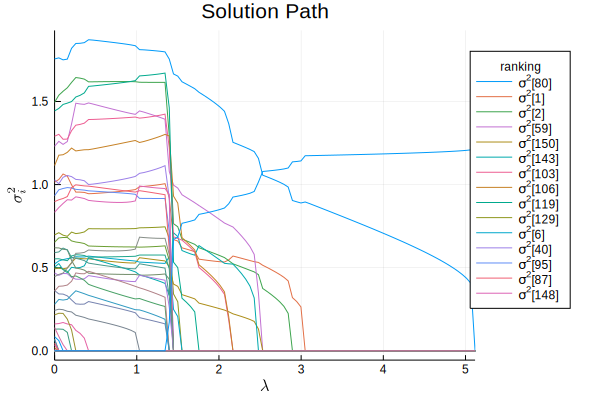

In [36]:
plotsolpath(σ̂2path_adlasso, λpath_adlasso; nranks=15, legendout=true)

#### MCP penalty

Finally we use MCPPenalty to create solution path. 

In [37]:
σ̂2path_mcp, objpath_mcp, λpath_mcp, _, β̂path_mcp = 
        vcselectpath(y, X, V; penfun=MCPPenalty(), fixedeffects=true,
        λpath=range(0, 4.0, length=100))

([1.0148 1.01936 … 0.0 0.0; 1.4949 1.49298 … 0.0 0.0; … ; 0.493273 0.489532 … 0.0 0.0; 1.0e-8 1.0e-8 … 1.19844 1.20008], [-4.80399, -3.99745, -3.20454, -2.41528, -1.64293, -0.902528, -0.136298, 0.622957, 1.31621, 2.06251  …  29.9034, 29.9382, 29.9731, 30.0081, 30.0435, 30.0791, 30.1151, 30.1515, 30.1887, 30.2268], 0.0:0.04040404040404041:4.0, [1000, 1000, 1000, 1000, 1000, 1000, 979, 1000, 404, 204  …  121, 127, 133, 140, 148, 157, 169, 183, 202, 228], [1.03466, 1.03458, 1.03454, 1.0344, 1.03402, 1.03399, 1.03406, 1.03477, 1.035, 1.03498  …  0.99889, 0.998909, 0.99893, 0.998953, 0.998977, 0.999004, 0.999032, 0.999064, 0.9991, 0.999141])

In [38]:
λpath_mcp

0.0:0.04040404040404041:4.0

In [39]:
σ̂2path_mcp

151×100 Array{Float64,2}:
 1.0148        1.01936    1.03168    …  0.0     0.0      0.0      0.0    
 1.4949        1.49298    1.49119       0.0     0.0      0.0      0.0    
 0.497996      0.497564   0.495117      0.0     0.0      0.0      0.0    
 1.73181e-105  0.0        0.0           0.0     0.0      0.0      0.0    
 4.41185e-82   0.0        0.0           0.0     0.0      0.0      0.0    
 0.522078      0.523594   0.5228     …  0.0     0.0      0.0      0.0    
 5.75845e-115  0.0        0.0           0.0     0.0      0.0      0.0    
 5.0243e-17    0.0        0.0           0.0     0.0      0.0      0.0    
 9.56908e-49   0.0        0.0           0.0     0.0      0.0      0.0    
 0.084671      0.0826759  0.0775375     0.0     0.0      0.0      0.0    
 1.48423e-55   0.0        0.0        …  0.0     0.0      0.0      0.0    
 3.67406e-33   0.0        0.0           0.0     0.0      0.0      0.0    
 0.0666884     0.0745646  0.0866925     0.0     0.0      0.0      0.0    
 ⋮          

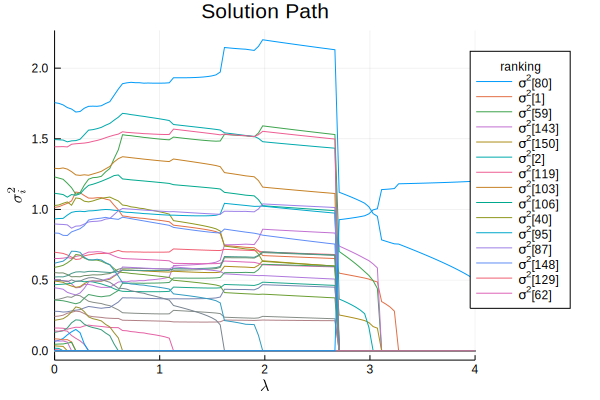

In [40]:
plotsolpath(σ̂2path_mcp, λpath_mcp; nranks=15, legendout=true)